<a href="https://colab.research.google.com/github/msalihk1git/Project_3/blob/main/HR_ANALYTICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Loading required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

Loading Dataset

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Luminar_Projects/Project/Project_3/HR_train.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Basic EDA

In [4]:
#Data infromation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
#Shape of the dataset
df.shape

(54808, 14)

In [6]:
#Describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [7]:
#Checking Null values
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Filling Null Values

In [8]:
df.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [9]:
df.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [10]:
df['education'].fillna(df['education'].mode()[0],inplace=True)
df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0],inplace=True)

In [11]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [12]:
df.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

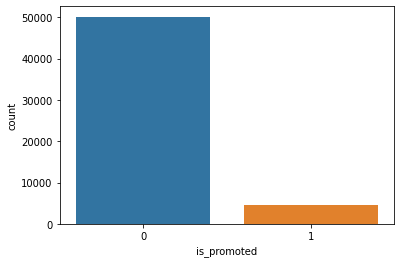

In [13]:
sns.countplot('is_promoted',data=df)

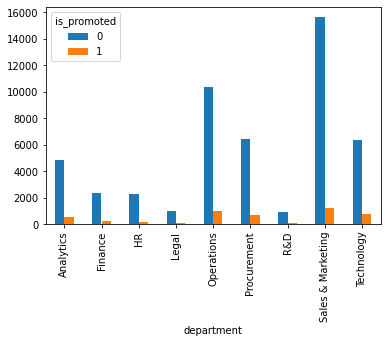

In [14]:
pd.crosstab(df.department,df.is_promoted).plot(kind='bar')

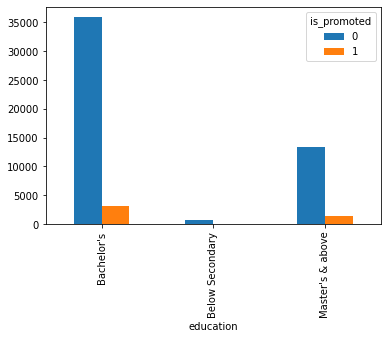

In [15]:
pd.crosstab(df.education,df.is_promoted).plot(kind='bar')

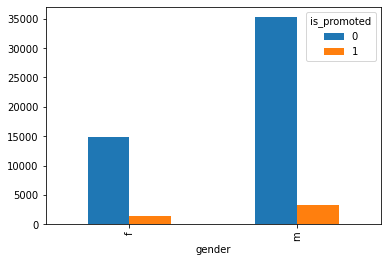

In [16]:
pd.crosstab(df.gender,df.is_promoted).plot(kind='bar')

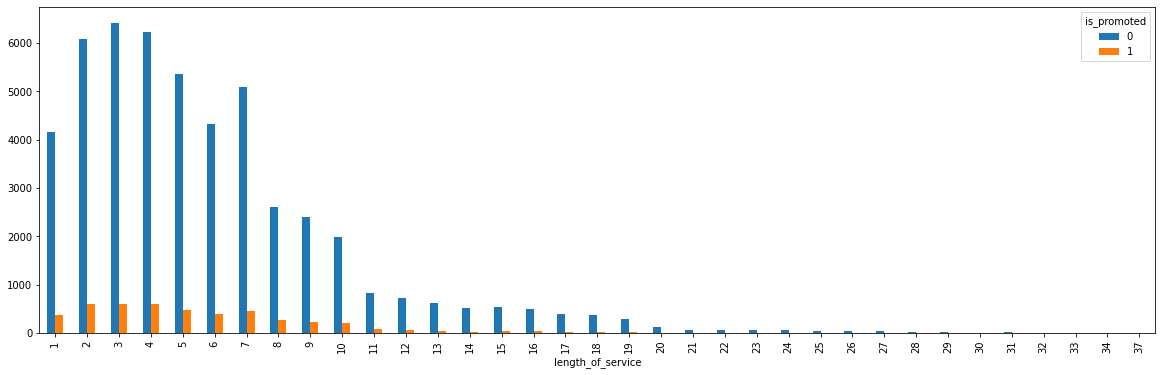

In [17]:
pd.crosstab(df.length_of_service,df.is_promoted).plot(kind='bar',figsize=(20,6))

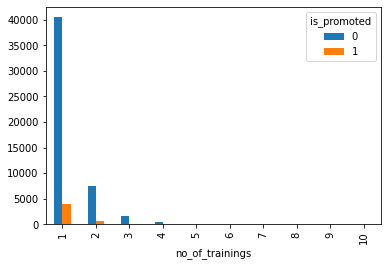

In [18]:
pd.crosstab(df.no_of_trainings,df.is_promoted).plot(kind='bar')

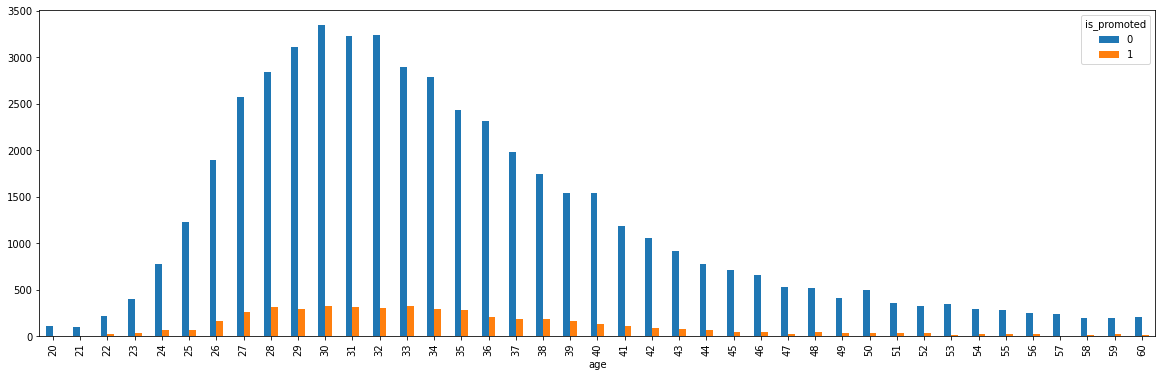

In [19]:
pd.crosstab(df.age,df.is_promoted).plot(kind='bar',figsize=(20,6))

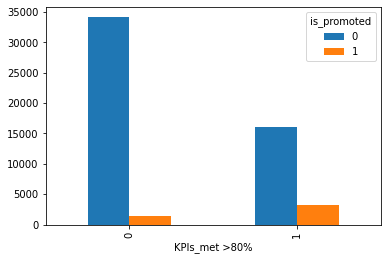

In [20]:
pd.crosstab(df['KPIs_met >80%'],df['is_promoted']).plot(kind='bar')

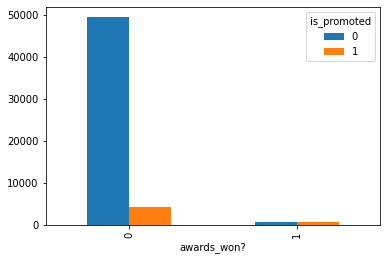

In [21]:
pd.crosstab(df['awards_won?'],df['is_promoted']).plot(kind='bar')

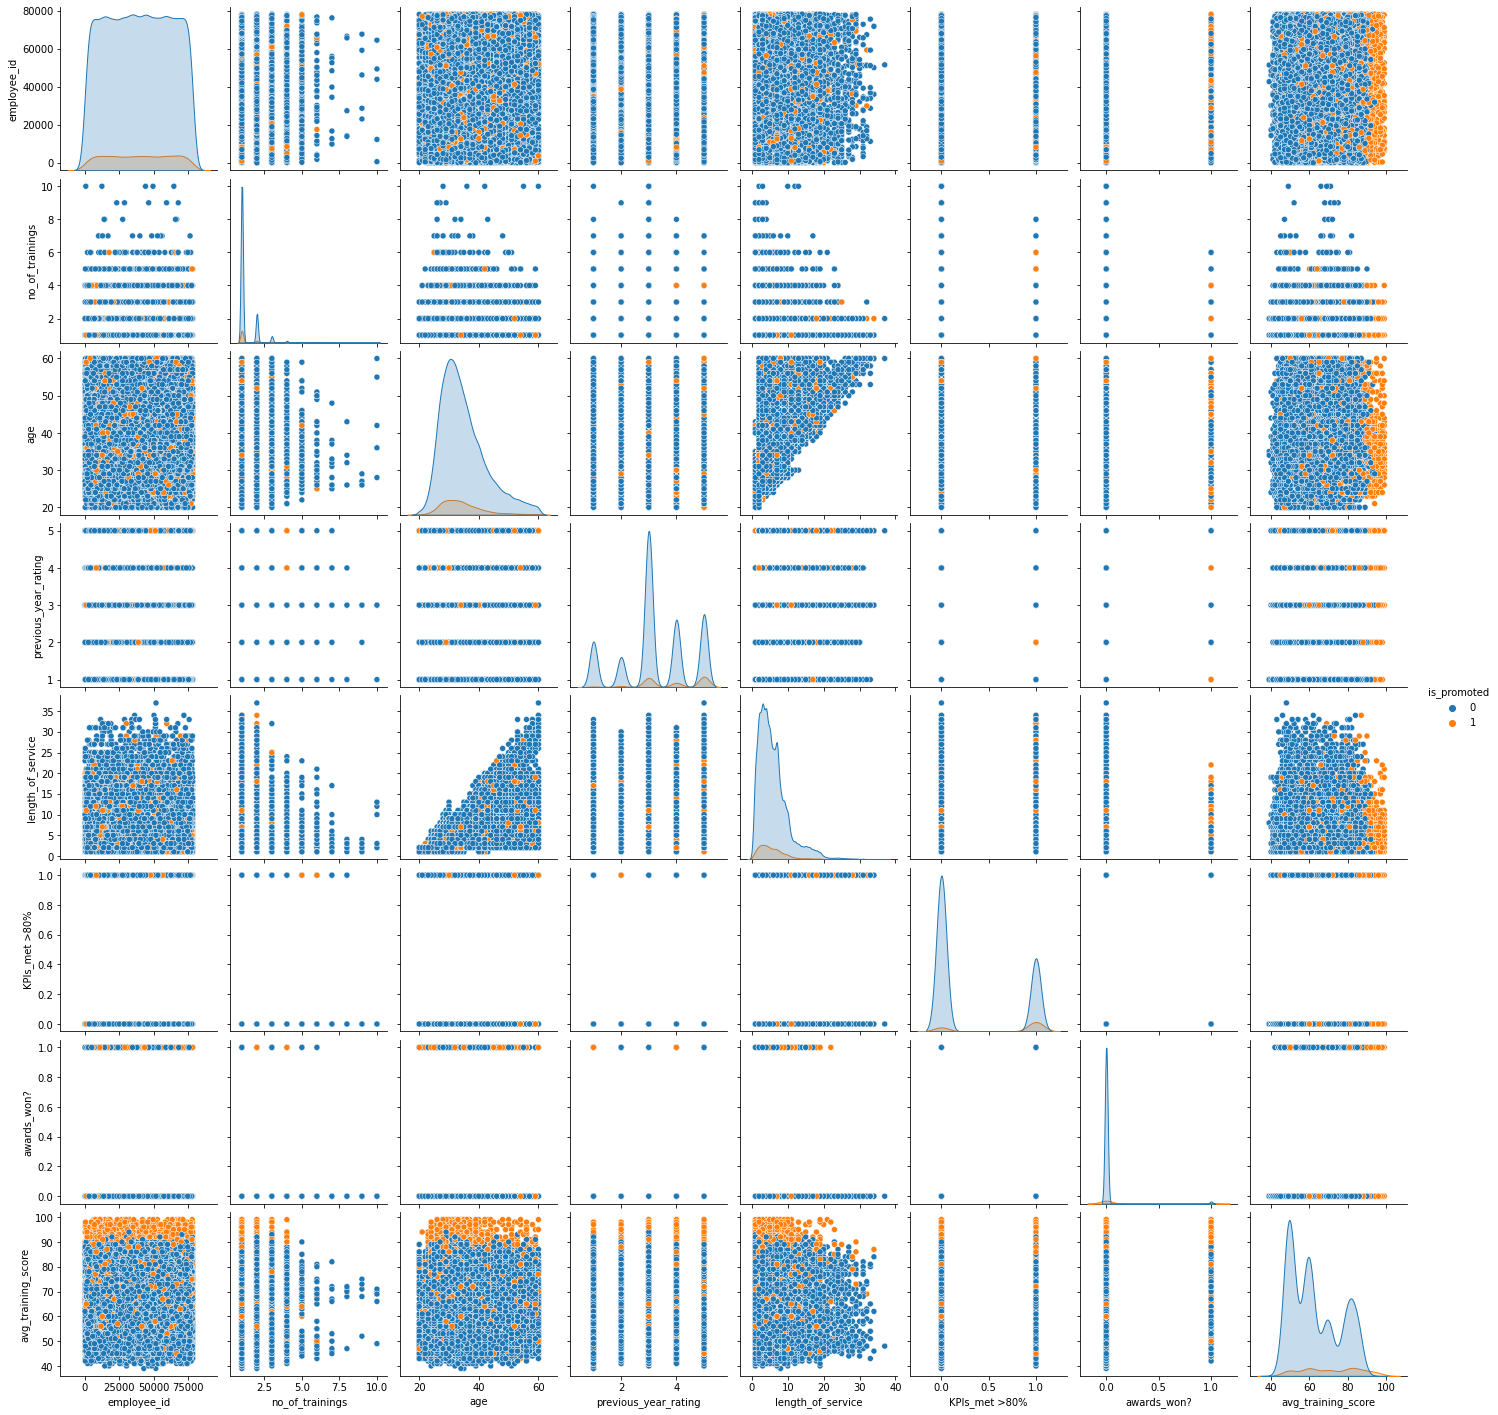

In [22]:
sns.pairplot(df,hue='is_promoted')

Correlation 

In [23]:
df.corr()['is_promoted']

employee_id             0.001206
no_of_trainings        -0.024896
age                    -0.017166
previous_year_rating    0.153230
length_of_service      -0.010670
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
is_promoted             1.000000
Name: is_promoted, dtype: float64

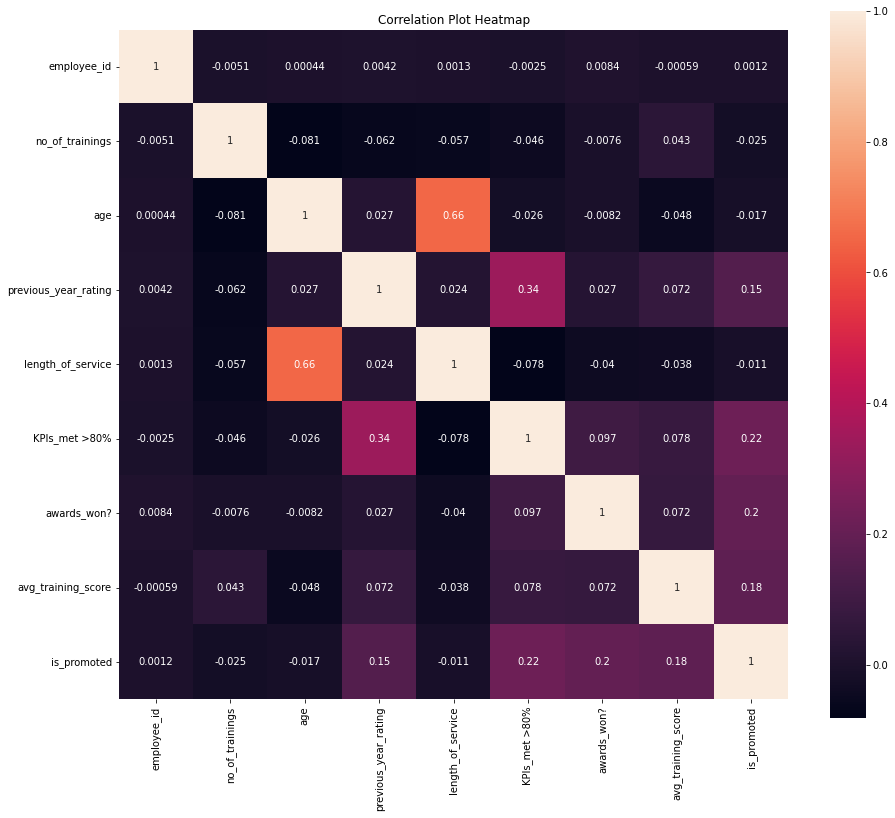

In [24]:
plt.figure(figsize = (15,13))
sns.heatmap(df.corr(), square = True, annot = True)
plt.title('Correlation Plot Heatmap')
plt.show()

Handling Outliers

In [25]:
numericalColumns=df.select_dtypes(include=np.number).columns
numericalColumns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [26]:
descreteCols=[]
continousCols=[]

for column in numericalColumns:
  if df[column].nunique()>20:
    continousCols.append(column)
  else:
    descreteCols.append(column)


In [27]:
continousCols

['employee_id', 'age', 'length_of_service', 'avg_training_score']

In [28]:
descreteCols

['no_of_trainings',
 'previous_year_rating',
 'KPIs_met >80%',
 'awards_won?',
 'is_promoted']

In [29]:
for column in continousCols:
  upper_lim=df[column].mean()+df[column].std()*3
  lower_lim=df[column].mean()-df[column].std()*3

  df.loc[(df[column] > upper_lim),column] = upper_lim
  df.loc[(df[column] < lower_lim),column] = lower_lim

In [30]:
#Removing column with missleading informations
df.drop('employee_id',axis=1,inplace=True)

In [31]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35.0,5.0,8.0,1,0,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,30.0,5.0,4.0,0,0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34.0,3.0,7.0,0,0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39.0,1.0,10.0,0,0,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,45.0,3.0,2.0,0,0,73.0,0


Converting string to integers

In [32]:
gender_map={'f':0,'m':1}
df=df.replace({'gender':gender_map})
df['gender']

0        0
1        1
2        1
3        1
4        1
        ..
54803    1
54804    0
54805    1
54806    1
54807    1
Name: gender, Length: 54808, dtype: int64

In [33]:
le_dept=LabelEncoder()
le_reg=LabelEncoder()
le_edu=LabelEncoder()
le_rech=LabelEncoder()

df['department'] = le_dept.fit_transform(df['department'])
df['recruitment_channel'] = le_rech.fit_transform(df['recruitment_channel' ])
df['education'] = le_edu.fit_transform(df['education'])
df['region'] = le_reg.fit_transform(df['region'])


In [34]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35.0,5.0,8.0,1,0,49.0,0
1,4,14,0,1,0,1,30.0,5.0,4.0,0,0,60.0,0
2,7,10,0,1,2,1,34.0,3.0,7.0,0,0,50.0,0
3,7,15,0,1,0,2,39.0,1.0,10.0,0,0,50.0,0
4,8,18,0,1,0,1,45.0,3.0,2.0,0,0,73.0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  int64  
 1   region                54808 non-null  int64  
 2   education             54808 non-null  int64  
 3   gender                54808 non-null  int64  
 4   recruitment_channel   54808 non-null  int64  
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  float64
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  float64
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 5.4 MB


**TRAIN TEST SPLIT**

In [36]:
X=df.drop(['is_promoted'],axis=1)
y=df['is_promoted']

In [37]:
X

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,31,2,0,2,1,35.0,5.0,8.0,1,0,49.0
1,4,14,0,1,0,1,30.0,5.0,4.0,0,0,60.0
2,7,10,0,1,2,1,34.0,3.0,7.0,0,0,50.0
3,7,15,0,1,0,2,39.0,1.0,10.0,0,0,50.0
4,8,18,0,1,0,1,45.0,3.0,2.0,0,0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,0,1,2,1,48.0,3.0,17.0,0,0,78.0
54804,4,19,2,0,0,1,37.0,2.0,6.0,0,0,56.0
54805,0,0,0,1,0,1,27.0,5.0,3.0,1,0,79.0
54806,7,33,0,1,2,1,29.0,1.0,2.0,0,0,45.0


In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

**SCALE DOWN**

In [39]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)


import joblib
joblib.dump(scale,"/content/drive/MyDrive/Luminar_Projects/Project/Project_3/scale.pkl")

['/content/drive/MyDrive/Luminar_Projects/Project/Project_3/scale.pkl']

**Apply all classification algorithms**

In [40]:
log =LogisticRegression()
dtc =DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
grad = GradientBoostingClassifier()
svc = SVC()
knn = KNeighborsClassifier()
nbc = GaussianNB()

voting=VotingClassifier(estimators=[("Logistic_Regression",log),("Decision_Tree_Classifier",dtc),("Random_Forest_Classifier",rf),("AdaBoost_Classifier",adb),("Gragient_Boosting_Classifier",grad),("SVC",svc),("KNeighborsClassifier",knn),("GaussianNB",nbc)],voting="hard")

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('Logistic_Regression', LogisticRegression()),
                             ('Decision_Tree_Classifier',
                              DecisionTreeClassifier()),
                             ('Random_Forest_Classifier',
                              RandomForestClassifier()),
                             ('AdaBoost_Classifier', AdaBoostClassifier()),
                             ('Gragient_Boosting_Classifier',
                              GradientBoostingClassifier()),
                             ('SVC', SVC()),
                             ('KNeighborsClassifier', KNeighborsClassifier()),
                             ('GaussianNB', GaussianNB())])

In [41]:
for  clf in (log,dtc,rf,adb,grad,svc,knn,nbc,voting):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print(clf.__class__.__name__,clf.score(X_train,y_train))
  print(clf.__class__.__name__,accuracy_score(y_test,y_pred))
  
  print("===========================")

LogisticRegression 0.9137278396557827
LogisticRegression 0.9173439486924311
DecisionTreeClassifier 0.9998093733830778
DecisionTreeClassifier 0.8957262121966053
RandomForestClassifier 0.9998093733830778
RandomForestClassifier 0.9373583236578759
AdaBoostClassifier 0.9214890662019009
AdaBoostClassifier 0.9278487311328578
GradientBoostingClassifier 0.9366574984341385
GradientBoostingClassifier 0.9403438934041024
SVC 0.913019797935786
SVC 0.9185050035937413
KNeighborsClassifier 0.9308570028049346
KNeighborsClassifier 0.9267429645601813
GaussianNB 0.9114130878788704
GaussianNB 0.915464145518881
VotingClassifier 0.9270172380926446
VotingClassifier 0.9289544977055344


**Hyperparameter Tuning**

In [44]:
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression()
df_clf= DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
adboost_clf = AdaBoostClassifier()
grad_clf = GradientBoostingClassifier()
svc_clf = SVC()
xgb_clf = XGBClassifier()
knn_clf = KNeighborsClassifier()

clf_list=[lr_clf,df_clf,rf_clf,adboost_clf,grad_clf,svc_clf,xgb_clf,knn_clf]

grid_params_lr= [{'penalty':['l1','l2'],'solver':['saga']}]

grid_params_df =[{'criterion':["gini","entropy"], 'splitter':['best','random'],'max_depth':[3,4,5],'min_samples_split':[2,3,4],'max_features':["auto","sqrt","log2"]}]

grid_params_rf=[{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt','auto'], 'criterion': ['entropy', 'gini'],'max_depth': [2, 3, 5, 10]}]

grid_params_adboost=[{'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1],}]

grid_params_grad=[{'loss':['log_loss','deviance', 'exponential'],'learning_rate':[1,7,9],'criterion':['friedman_mse','mse']}]

grid_params_svc=[{'kernel':['linear','poly','rbf'],'degree':[3,4,5]}]

grid_params_xgb=[{'booster':['gbtree', 'gblinear'],'nthread':[10,15,25]}]

grid_params_knn=[{'n_neighbors':[5,7,9,11],'algorithm':['ball_tree','kd_tree','brute'],'leaf_size':[30,50,100]}]



clf_params=[grid_params_lr,grid_params_df,grid_params_rf,grid_params_adboost,grid_params_grad,grid_params_svc,grid_params_xgb,grid_params_knn]

In [49]:
for clf,clf_param in zip(clf_list,clf_params):
  print(f"The Classifier is {clf} and its hyper params are {clf_param}")

  grid_clf = GridSearchCV(estimator=clf,param_grid=clf_param,scoring="accuracy",cv=10)
  grid_clf.fit(X_train_scaled,y_train)
  print(f"The Train accuracy for the {clf} is {grid_clf.score(X_train_scaled,y_train)}")
  print(f"The Test accuracy for the {clf} is {grid_clf.score(X_test_scaled,y_test)}")
  print(f"The best param for {clf} is {grid_clf.best_params_}")
  print("====================\n")

The Classifier is LogisticRegression() and its hyper params are [{'penalty': ['l1', 'l2'], 'solver': ['saga']}]
The Train accuracy for the LogisticRegression() is 0.9156885705726968
The Test accuracy for the LogisticRegression() is 0.9204400950959253
The best param for LogisticRegression() is {'penalty': 'l1', 'solver': 'saga'}

The Classifier is DecisionTreeClassifier() and its hyper params are [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2']}]
The Train accuracy for the DecisionTreeClassifier() is 0.9219247841834373
The Test accuracy for the DecisionTreeClassifier() is 0.927517001161055
The best param for DecisionTreeClassifier() is {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 2, 'splitter': 'best'}

The Classifier is RandomForestClassifier() and its hyper params are [{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt', '

KeyboardInterrupt: ignored

In [50]:
#making the best model
rf_clf = RandomForestClassifier(criterion = 'entropy',max_depth = 10,max_features = 'sqrt',n_estimators = 4)
rf_clf.fit(X_train_scaled,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       n_estimators=4)

In [51]:
#pickle file
import joblib
joblib.dump(rf_clf,"/content/drive/MyDrive/Luminar_Projects/Project/Project_3/model.pkl")

['/content/drive/MyDrive/Luminar_Projects/Project/Project_3/model.pkl']